In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab1_template.ipynb")

# EDS232 Lab 1: Regression

## General Lab Template
1. Look at the big picture.
2. Get the data.
3. Explore and visualize the data to gain insights.
4. Prepare the data for machine learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.

## Overview
In this lab, we will introduce the basics of machine learning in **Python** by focusing on **regression**, a core technique used to predict continuous outcomes. We will use the popular **scikit-learn** library, which provides easy-to-use tools for building and evaluating machine learning models.
Specifically, we will focus on how regression algorithms can help us model and predict water quality data.

## Objectives
By the end of this lab, you will be able to:
- Understand the concept of regression and its implementation in Pythnon
- Implement simple and multiple linear regression models
- Evaluate model performance using various metrics like **R²**, **MSE**, and **RMSE**
- Visualize regression prediction results 

## Key Concepts
- **Machine Learning**: A subset of artificial intelligence where algorithms learn patterns from data to make predictions or decisions without being explicitly programmed.
- **Regression**: A machine learning method for predicting continuous values.
  - **Simple Linear Regression**: A regression model with one independent variable.
  - **Multiple Linear Regression**: A regression model with two or more independent variables.
  
- **Scikit-learn**: A Python library that provides simple and efficient tools for data mining and machine learning. We will use it for:
  - **Data Preprocessing**: Preparing data for the model.
  - **Model Training**: Fitting the regression model to our data.
  - **Model Evaluation**: Assessing model performance using model evaluation metrics

- **Model Evaluation Metrics**: Tools to assess how well our model fits the data, such as:
  - **R² (R-squared)**: Measures the proportion of variance in the dependent variable that is predictable from the independent variable(s).
  - **MAE (Mean Absolute Error)**: The average of the absolute differences between predicted and actual values.
  - **RMSE (Root Mean Square Error)**: The square root of the average squared differences between predicted and actual values.



### Step 1: Import libraries and load data


#### About the data

- We will be working with data regarding water quality in the Hudson River during and after Hurricane Irene in 2011. This dataset contains obesrvations in 15 minute increments over a span of 10 days. Measurements observed includ rainfall, depth, turbidity, water temperature, and dissolved oxygen. The data come from the Cary Institute and can be found [here](https://docs.google.com/spreadsheets/d/1MsSf679OsQpt4y6btV3tLPf-i8_bdoTZ/edit?gid=511934884#gid=511934884). 


- Notice that the data is not a csv file and is instead a .xlsx file! Use the `pandas.read_excel` function to read in your data. You can find more documentation on reading in .xlsx files [here](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

- In this lab, we are interested in the turbidity and dissolved oxygen variables. Read the data into the `hurricane_do` and `hurricane_turbidity` variables. Then, merge these two dataframes. Store the result in the `df` variable. Drop the columns that contain data for Piedmont. We are only interested in the Port of Albany and Norrie Point. 


#### Load libraries

In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures



In [23]:
df.columns

Index(['date', 'albany_DO', 'albany_turbidity', 'piedmont_DO',
       'piedmont_turbidity'],
      dtype='object')

In [24]:
hurricane_do = pd.read_excel('data/Hurricane_Irene_Hudson_River.xlsx', sheet_name = 5) # SOLUTION
hurricane_turbidity = pd.read_excel('data/Hurricane_Irene_Hudson_River.xlsx', sheet_name = 2) # SOLUTION
df = hurricane_do.merge(hurricane_turbidity, on = 'Date Time (ET)').drop(['Piermont D.O. (ppm)', 'Piermont Turbidity in NTU'], axis = 1) # SOLUTION

In [ ]:
grader.check("q1")

### Step 2: Explore  and clean the data

Do some initial exploratory analysis on the data. Check out what type of data you are working with, and create a few plots of your data. Write a few sentences on your findings. 

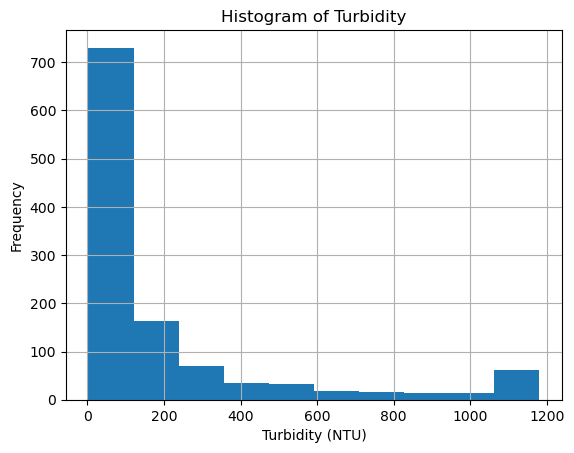

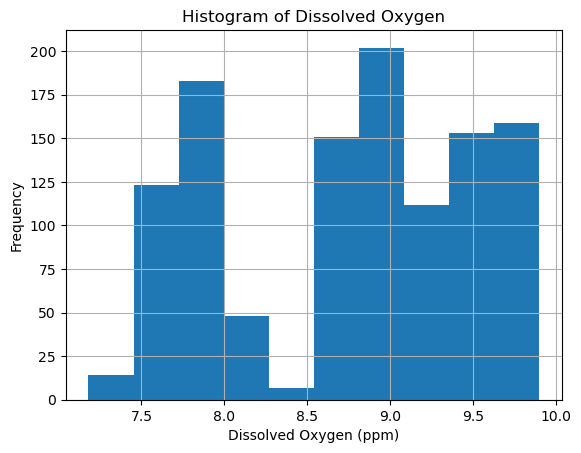

In [26]:
# Explore and Visualize data 
# ex: scatterplot, correlation matrix
df[' Port of Albany Turbidity in NTU'].hist()
plt.title('Histogram of Turbidity')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Frequency')
plt.show()

df[' Port of Albany D.O. (ppm)'].hist()
plt.title('Histogram of Dissolved Oxygen')
plt.xlabel('Dissolved Oxygen (ppm)')
plt.ylabel('Frequency')
plt.show()

*Update this markdown cell with your findings.* 

When you were exploring the data, you may have noticed that the column names aren't the cleanest. Update the column names to the following : `date`, `albany_DO`, `norrie_DO`, `albany_turbidity`, `norrie_turbidity`. 

In [29]:
df.columns = ['date', 'albany_DO', 'norrie_DO', 'albany_turbidity', 'norrie_turbidity'] # SOLUTION NO PROMPT
df # Check to make sure column names were updated

,date,albany_DO,norrie_DO,albany_turbidity,norrie_turbidity
0,2011-08-25 00:00:00,7.68,7.81,4.0,9.3
1,2011-08-25 00:15:00,7.60,7.73,3.9,8.4
2,2011-08-25 00:30:00,7.57,7.63,4.3,7.9
3,2011-08-25 00:45:00,7.72,7.67,4.7,8.1
4,2011-08-25 01:00:00,7.74,7.63,4.4,8.4
...,...,...,...,...,...
1147,2011-09-05 22:45:00,8.73,6.84,47.2,144.1
1148,2011-09-05 23:00:00,8.76,6.78,56.7,139.7
1149,2011-09-05 23:15:00,8.66,6.83,47.0,141.2
1150,2011-09-05 23:30:00,8.75,6.79,48.7,127.9


In [ ]:
grader.check("q2")

### Step 3: Prepare the data for Machine Learning

It is time to split our data into training and testing data for our linear regression model. Split your training and testing data where `albany_DO` is your predictor variable and `albany_turbidity` is you response variable. 

In [59]:
# Select features and target
X = df[['albany_DO']] # SOLUTION
Y = df['albany_turbidity'] # SOLUTION


X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=42) # SOLUTION 

In [ ]:
grader.check("q3")

### Step 4: Select your model

We are going to use linear regression to predict the whole weight of oysters. Is linear regression a good model to pick to achieve this goal? Answer in the markdown cell below.

*Your answer here*.

In [61]:
# Initialize and fit the model
model = LinearRegression() # SOLUTION 
model.fit(X_train, Y_train) # SOLUTION NO PROMPT

LinearRegression()

In [ ]:
grader.check("q4")

### Step 5: Evaluate the model

- Make predictions with your model and check the performance of the model after.
- Check how your model perfromed by look at the mean squared error and the $R^2$ score.
- Create a scatter plot of the Y predictions and your Y test data. 

Mean Squared Error: 48731.6947400043
R² Score: 0.4896381383344557


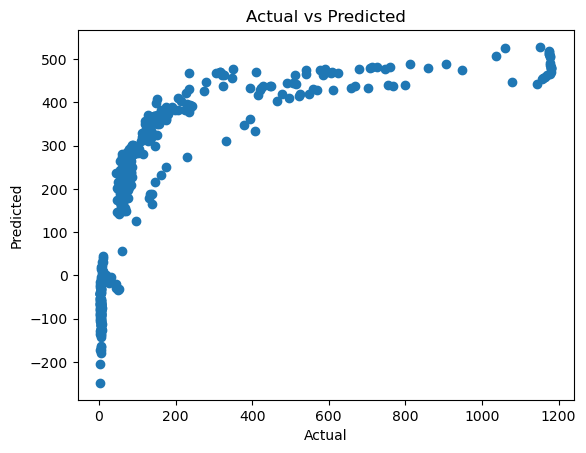

In [64]:
# Make predictions
Y_pred = model.predict(X_test) # SOLUTION 

# Calculate evaluation metrics using scikit-learn's mean_squared_error and r2_score
mse = mean_squared_error(Y_test, Y_pred) # SOLUTION
r2 = r2_score(Y_test, Y_pred) # SOLUTION

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

#Visualize predictions vs. actual values
plt.scatter(Y_test, Y_pred) # SOLUTION NO PROMPT
plt.xlabel('Actual') # SOLUTION NO PROMPT
plt.ylabel('Predicted') # SOLUTION NO PROMPT
plt.title('Actual vs Predicted') # SOLUTION NO PROMPT
plt.show() # SOLUTION NO PROMPT


In [ ]:
grader.check("q5")

### Step 6: Fine tune the model

Get the cross validation score to see how your model performed across the different folds. In the markdown cell below, explain what cross valiadtion is and what the cross validation score represents. 

*Type your answer here.*

In [73]:

#Use cross_val_score() to fine-tune the model
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {-scores}")


Cross-validation scores: [54698.71458122 50247.53217975 51966.65102117 40189.010764
 46076.16681613]


In [ ]:
grader.check("q6")

### Step 7:  Present the Solution
In the markdown cell below, discuss how your model performed overall. If the model performed poorly, why do you think it did so? If it performed well, why do you think it did so? What could future analysis include? 

*Your answer here.*

### *Before we ran our model, we should have first looked at the data to see if there was a lienar relationship between our variables.Let's check now!*

<Figure size 1000x600 with 0 Axes>

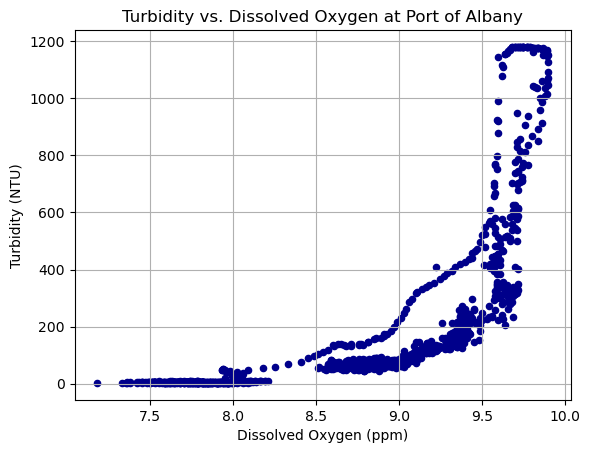

In [85]:
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
df.plot.scatter(x='albany_DO', y='albany_turbidity', c='DarkBlue')

plt.title('Turbidity vs. Dissolved Oxygen at Port of Albany')
plt.xlabel('Dissolved Oxygen (ppm)')
plt.ylabel('Turbidity (NTU)')
plt.grid(True)
plt.show()

### Step 8: Check to see if polynomial regression performs better

We assumed linear regression would work best with our data, but lets check to see how a polynomial regression performs in comparison. Transform the features for polynomial regression. Use the `PolynomialFeatures` library from `sklearn.preprocessing`. 

In [96]:
# Transform features to include polynomial terms (degree 2 for quadratic terms)
poly = PolynomialFeatures(degree=2) # SOLUTION
X_poly_train = poly.fit_transform(X_train) # SOLUTION
X_poly_test = poly.transform(X_test) # SOLUTION

# View the transformed feature set (for insight)
print(X_poly_train)

[[ 1.      7.92   62.7264]
 [ 1.      9.     81.    ]
 [ 1.      9.7    94.09  ]
 ...
 [ 1.      8.75   76.5625]
 [ 1.      9.09   82.6281]
 [ 1.      8.6    73.96  ]]


### Step 9: Fit your model on the polynomial features

In [97]:
# Train the model on polynomial features 
poly_model = LinearRegression() # SOLUTION
poly_model.fit(X_poly_train, Y_train) # SOLUTION NO PROMPT

LinearRegression()

### STEP 10: Evaluate the polynomial regression model 
- Make predictions with your model and check the performance of the model after.
- Check how your model perfromed by look at the mean squared error and the $R^2$ score.
- Create a scatter plot of the Y polynomial predictions and your Y test data.

Polynomial Regression Mean Squared Error: 24159.54013290374
Polynomial Regression R² Score: 0.7469797029428922


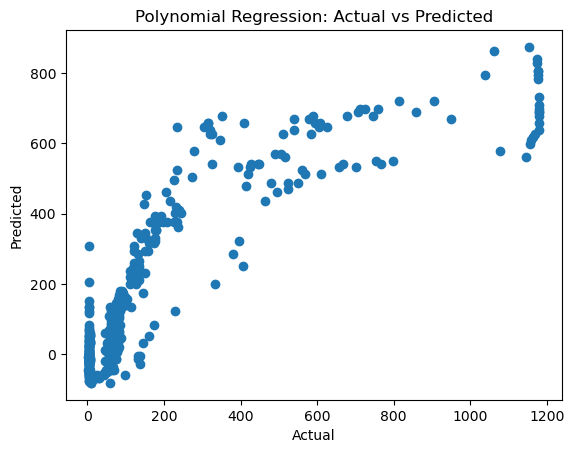

In [98]:
# Make predictions using the polynomial model
Y_poly_pred = poly_model.predict(X_poly_test) # SOLUTION

# Calculate evaluation metrics using scikit-learn's mean_squared_error and r2_score
poly_mse = mean_squared_error(Y_test, Y_poly_pred) # SOLUTION
poly_r2 = r2_score(Y_test, Y_poly_pred) # SOLUTION

print(f"Polynomial Regression Mean Squared Error: {poly_mse}")
print(f"Polynomial Regression R² Score: {poly_r2}")

# Plot predictions vs actual
plt.scatter(Y_test, Y_poly_pred) # SOLUTION NO PROMPT
plt.xlabel('Actual') # SOLUTION NO PROMPT
plt.ylabel('Predicted') # SOLUTION NO PROMPT
plt.title('Polynomial Regression: Actual vs Predicted') # SOLUTION NO PROMPT
plt.show() # SOLUTION NO PROMPT

In [ ]:
grader.check("q10")

### Step 11: Compare your polynomial and linear regression results

What differences did you notice between you polynomial regression and linear regression results? Which model performed better? Why do you think this is? Write your answer in the markdown cell below. 

*Your answer here.*